## 1. Dataset Information

#### Context:
Credit card companies need to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

#### Content:
- **Dataset**: Transactions made by European cardholders in September 2013.
- **Duration**: Two days, with 492 frauds out of 284,807 transactions.
- **Class Imbalance**: Fraudulent transactions (positive class) account for 0.172% of all transactions.
- **Features**:
  - Numerical input variables resulting from PCA transformation.
  - 'Time': Seconds elapsed between each transaction and the first transaction.
  - 'Amount': Transaction amount, suitable for cost-sensitive learning.

- **Target**:
  - 'Class': Response variable, 1 for fraud, 0 otherwise.
  
#### Source:
- The dataset has been collected and analyzed by Worldline and the Machine Learning Group (MLG) of Université Libre de Bruxelles (ULB) as part of a research collaboration on big data mining and fraud detection.
- More details on the current and past projects related to fraud detection are available on the [MLG website](http://mlg.ulb.ac.be) and [ResearchGate](https://www.researchgate.net/project/Fraud-detection-5).

#### Recommendations:
- Due to class imbalance, accuracy should be measured using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful.
  




## 2. Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [15]:
# Read the CSV file 'creditcard.csv' into a Pandas DataFrame named df
df = pd.read_csv('../data/raw_data/creditcard.csv')


In [5]:
# Display the first few rows of the DataFrame df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display a concise summary of the DataFrame df, including column names, non-null counts...
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())


Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


<Axes: xlabel='Class', ylabel='count'>

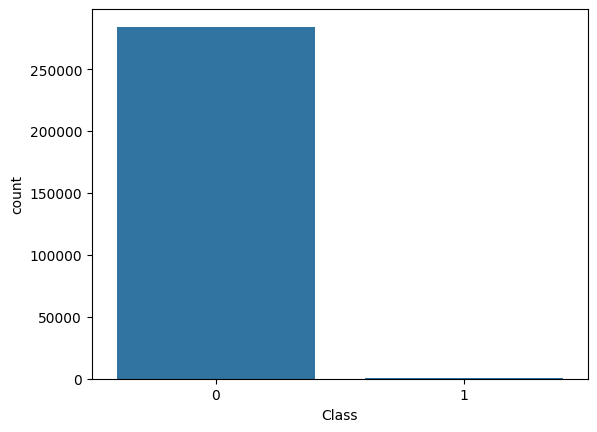

In [6]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
sns.countplot(x='Class', data=df)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    ⚠️ Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions. In the next sections, we will explore effective strategies for handling this imbalance.
</div>

## 3. Features Selection

In [9]:
# Calculate the correlation between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]
x

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

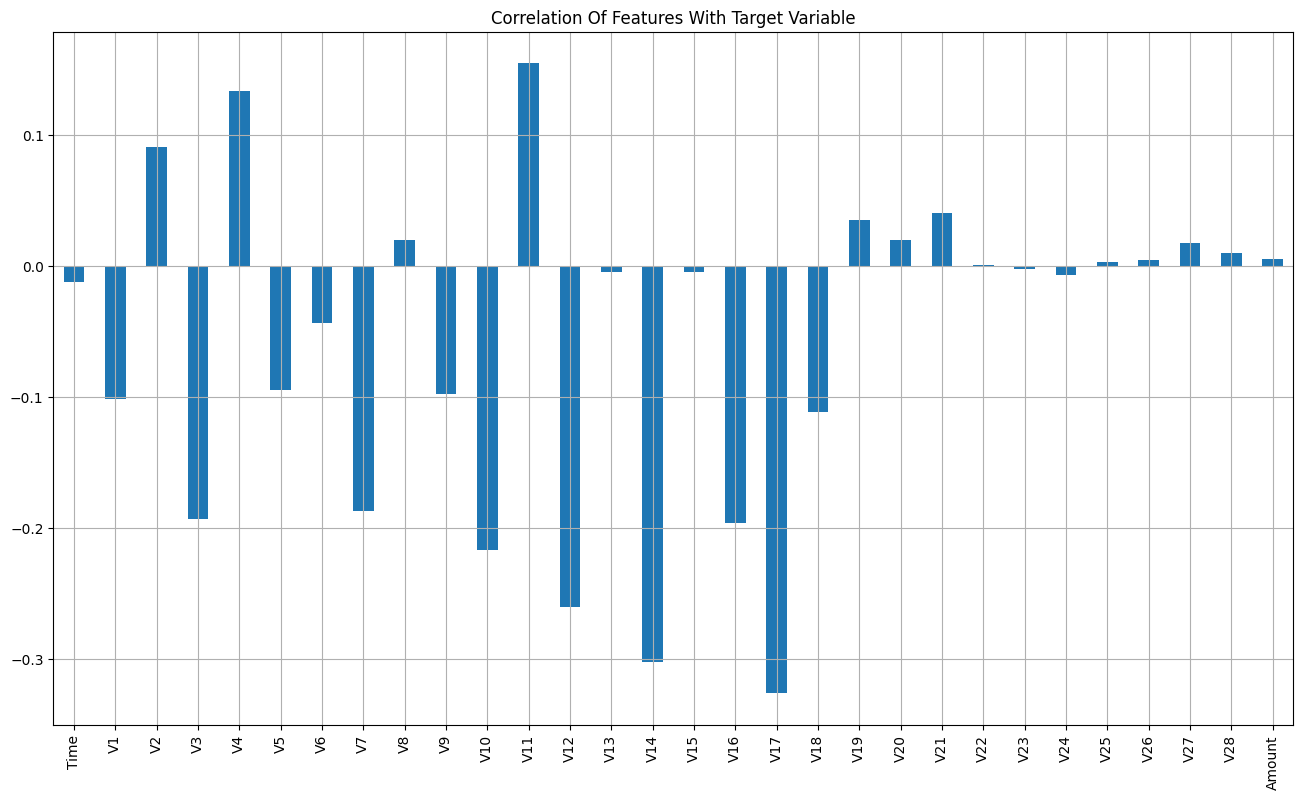

In [10]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Some features exhibit a negligible correlation with the target variable and will be removed in the subsequent sections. First, we'll examine the intercorrelation among variables.
</div>

<Axes: >

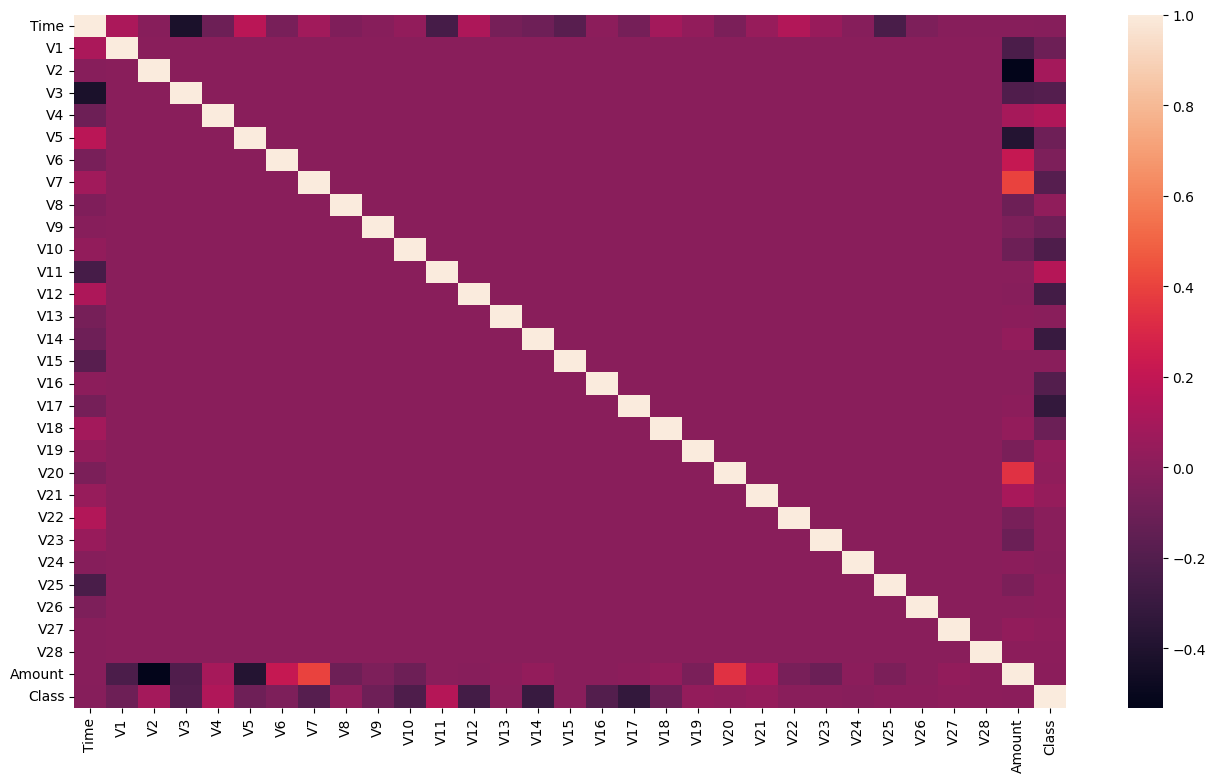

In [11]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df
sns.heatmap(df.corr())

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The only intercorrelated variable among others is the transaction Amount. However, this variable shows no correlation with the target variable, so it will also be removed.
</div>

In [20]:
# Calculate the correlation coefficients between 'Class' and all columns
y = df.corr()['Class']

# Create a copy of the DataFrame df
df2 = df.copy()

# Iterate through columns and drop those with absolute correlation less than 0.13
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌Here, we filter our dataset to keep only features with a correlation above 0.13.
</div>

In [13]:
# Display the first few rows of the DataFrame df2
df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<Axes: >

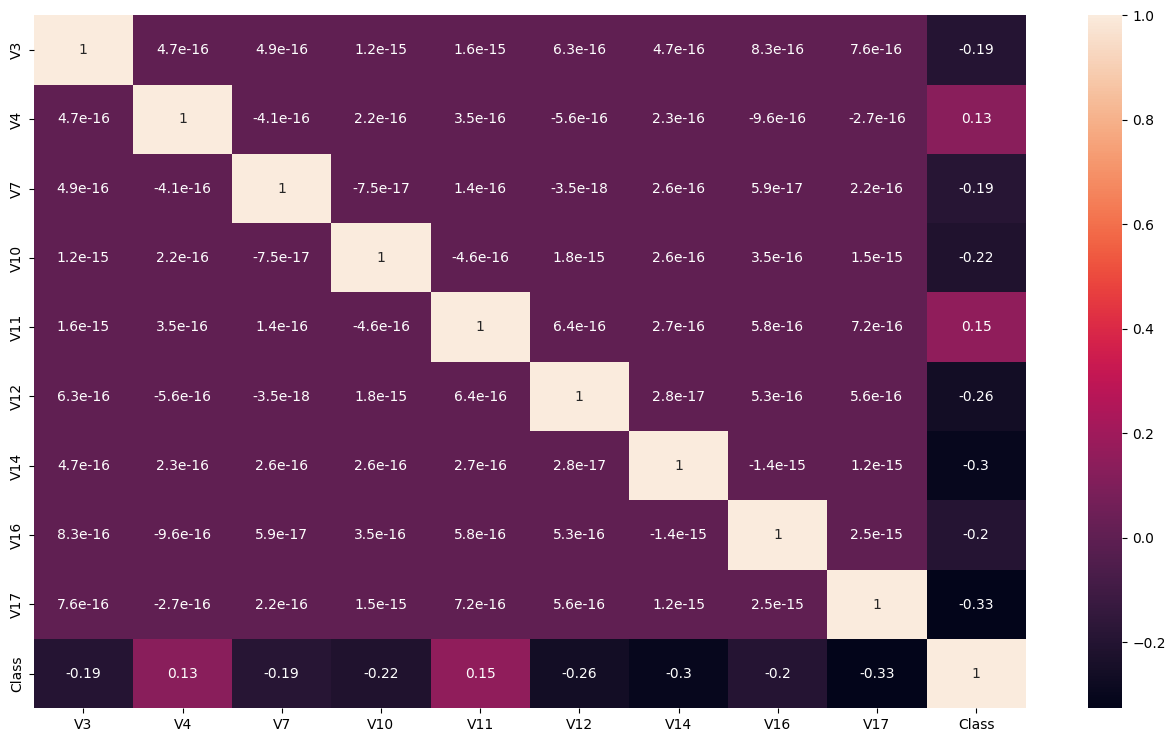

In [14]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df2
sns.heatmap(df2.corr(), annot=True)

<Axes: title={'center': 'Top Correlated Features With The Target Variable'}>

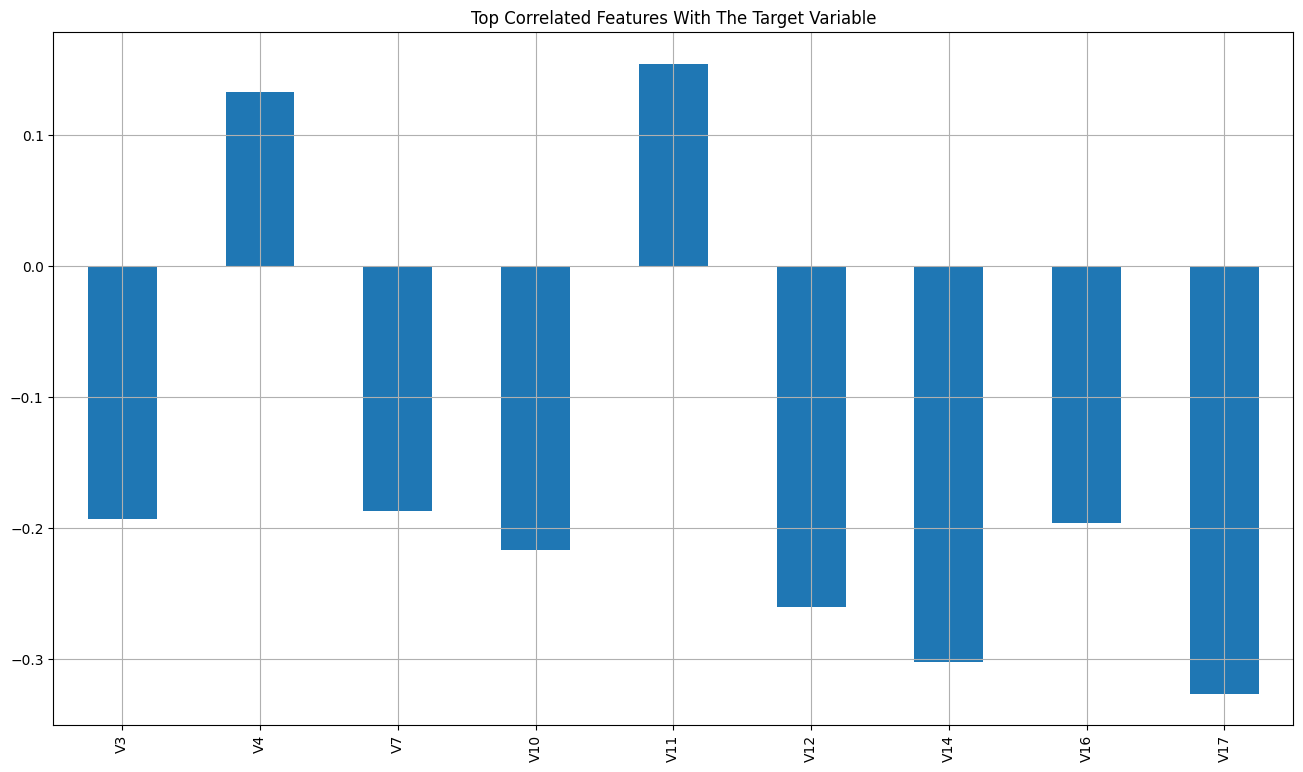

In [15]:
# Calculate the correlation coefficients between the 'Class' column 
x = df2.corr()['Class'][:9]

# Create a bar plot to visualize the top correlated features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Top Correlated Features With The Target Variable", grid=True)


## 4. Handling Data Imbalance



- This dataset consists of:
  - Number of records with the class value 0: 284,315
  - Number of records with the class value 1: 492

Using this dataset as it is would be a fatal mistake due to its severe class imbalance. Here's why:

- **Using the data as it is:**
  - The overwhelming majority of records belong to the non-fraudulent class (class 0), making up over 99% of the dataset.
  - Models trained on imbalanced data may prioritize accuracy on the majority class while neglecting the minority class (fraudulent transactions). This can result in poor performance in detecting fraud.

- **Why oversampling is a fatal mistake:**
  - Oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) artificially inflate the minority class by generating synthetic examples. However, this can lead to overfitting and the introduction of noise, especially in cases where the minority class is already sparsely represented.

- **Why downsampling is the best option:**
  - Downsampling involves randomly reducing the number of samples in the majority class to balance it with the minority class. This approach helps mitigate the biases towards the majority class while maintaining the integrity of the dataset.
  - By reducing the number of majority class samples to match the minority class, downsampling encourages the model to learn from both classes equally, improving its ability to accurately detect fraudulent transactions.




1. **Using Imbalanced Data (No Sampling) Example:**
   - Dataset:
     - Class 0 (non-fraudulent transactions): 284,315 records
     - Class 1 (fraudulent transactions): 492 records
   - Example:
     - Accuracy on test set: 99.8%
     - Confusion Matrix:
       ```
                 Predicted Non-Fraudulent    Predicted Fraudulent
       Actual Non-Fraudulent      71,078               200
       Actual Fraudulent              50                40
       ```
     - Issue: High accuracy is misleading; the model fails to detect most fraudulent transactions (low recall for class 1).

2. **Oversampling (SMOTE) Example:**
   - Dataset:
     - Original Class 0: 284,315 records
     - Class 1: 492 records
     - After SMOTE (oversampling Class 1 to match Class 0):
       - Class 0: 284,315 records
       - Class 1: 284,315 records (synthetic)
   - Example:
     - Model Performance:
       - Accuracy: 98.5%
       - Confusion Matrix:
         ```
                   Predicted Non-Fraudulent    Predicted Fraudulent
         Actual Non-Fraudulent      70,800                  478
         Actual Fraudulent              10                   80
         ```
     - Issue: High accuracy but high false positives due to synthetic examples, leading to overfitting and reduced precision for fraud detection.

<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana;">
     ⚠️ Please note that we are discussing the training data, not the test data. The test data should represent "reality." If the data the model will encounter in real life is imbalanced, then the model should be tested on imbalanced data. However, as explained earlier, to avoid bias in learning, the model should be trained on balanced data.

</div>


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Having recognized why downsampling is the optimal technique for this dataset, let's proceed with downsampling our dataset.
    We will downsample the entire dataset just to study outliers. Later, we will perform a proper split of the training and test data. The training data will be downsampled/balanced, while the test data will reflect the original data distribution to evaluate the model in a real-world scenario
</div>

In [21]:

from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
y = df2['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,Class
14006,1.166753,0.133941,0.081963,0.475666,-0.453648,0.431945,-0.524328,1.107770,-0.479111,1.170787,-2.217320,1.977792,-0.265151,0.774991,-0.568905,0
4167,-0.052246,-0.036001,0.360702,-2.276312,1.996213,-0.236639,0.570968,-0.093997,0.030064,0.932436,-3.605012,1.099589,1.348007,0.359880,-0.711164,0
19198,-0.965075,0.987784,0.833003,0.251294,3.004411,0.599849,0.489327,-0.439287,0.715123,-0.699366,-0.522018,-0.662443,0.557408,-1.223664,-0.222938,0
2647,-1.051339,0.306012,1.579370,0.230733,-3.175186,2.157827,-0.304403,0.478944,-0.755578,-0.235085,0.213706,-0.735174,-0.779713,0.805364,-0.919198,0
39162,-0.633656,0.835545,1.421651,-0.107774,0.847008,0.575105,0.243803,-0.227342,-0.382290,1.150920,0.352896,-0.548772,-1.074502,1.214796,-2.231315,0


In [17]:
# Display the shape of the downsampled DataFrame downsampled_df
downsampled_df.shape

(984, 10)

## 5. Outliers?

<Axes: xlabel='Class', ylabel='count'>

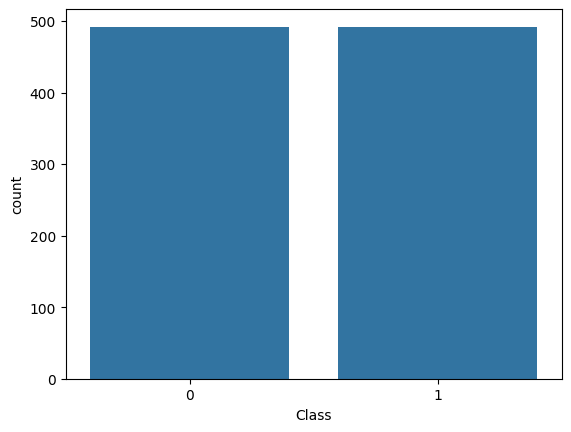

In [14]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the downsampled DataFrame downsampled_df
sns.countplot(x='Class', data=downsampled_df)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Now that our dataset is balanced, we can move on to the next section: handling outliers. How should we approach outliers? Should we simply delete them? Let's explore.
</div>

<Axes: xlabel='V11', ylabel='V17'>

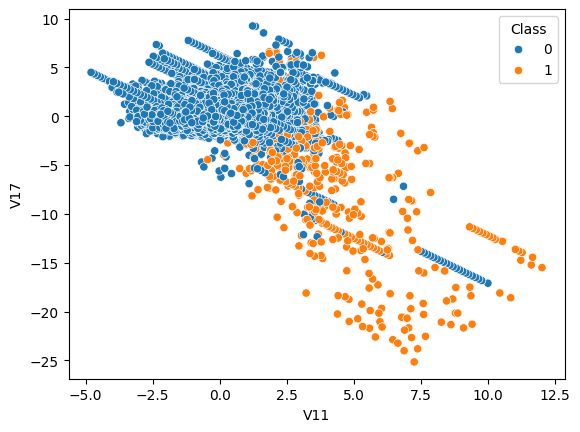

In [15]:
# Plotting using seaborn scatterplot
sns.scatterplot(x='V11', y='V17', hue='Class', data=df2)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Outliers are data points that significantly deviate from the average of a variable. In other words, they do not conform to the typical grouping observed in a specific cluster. Did you notice something interesting in this plot? The blue dots represent normal transactions, tightly clustered with very few outliers. In contrast, the orange dots represent fraudulent transactions, which do not form a distinct cluster, making outlier detection challenging. Is this pattern consistent across all variables or just in this example? Let's investigate further.
</div>

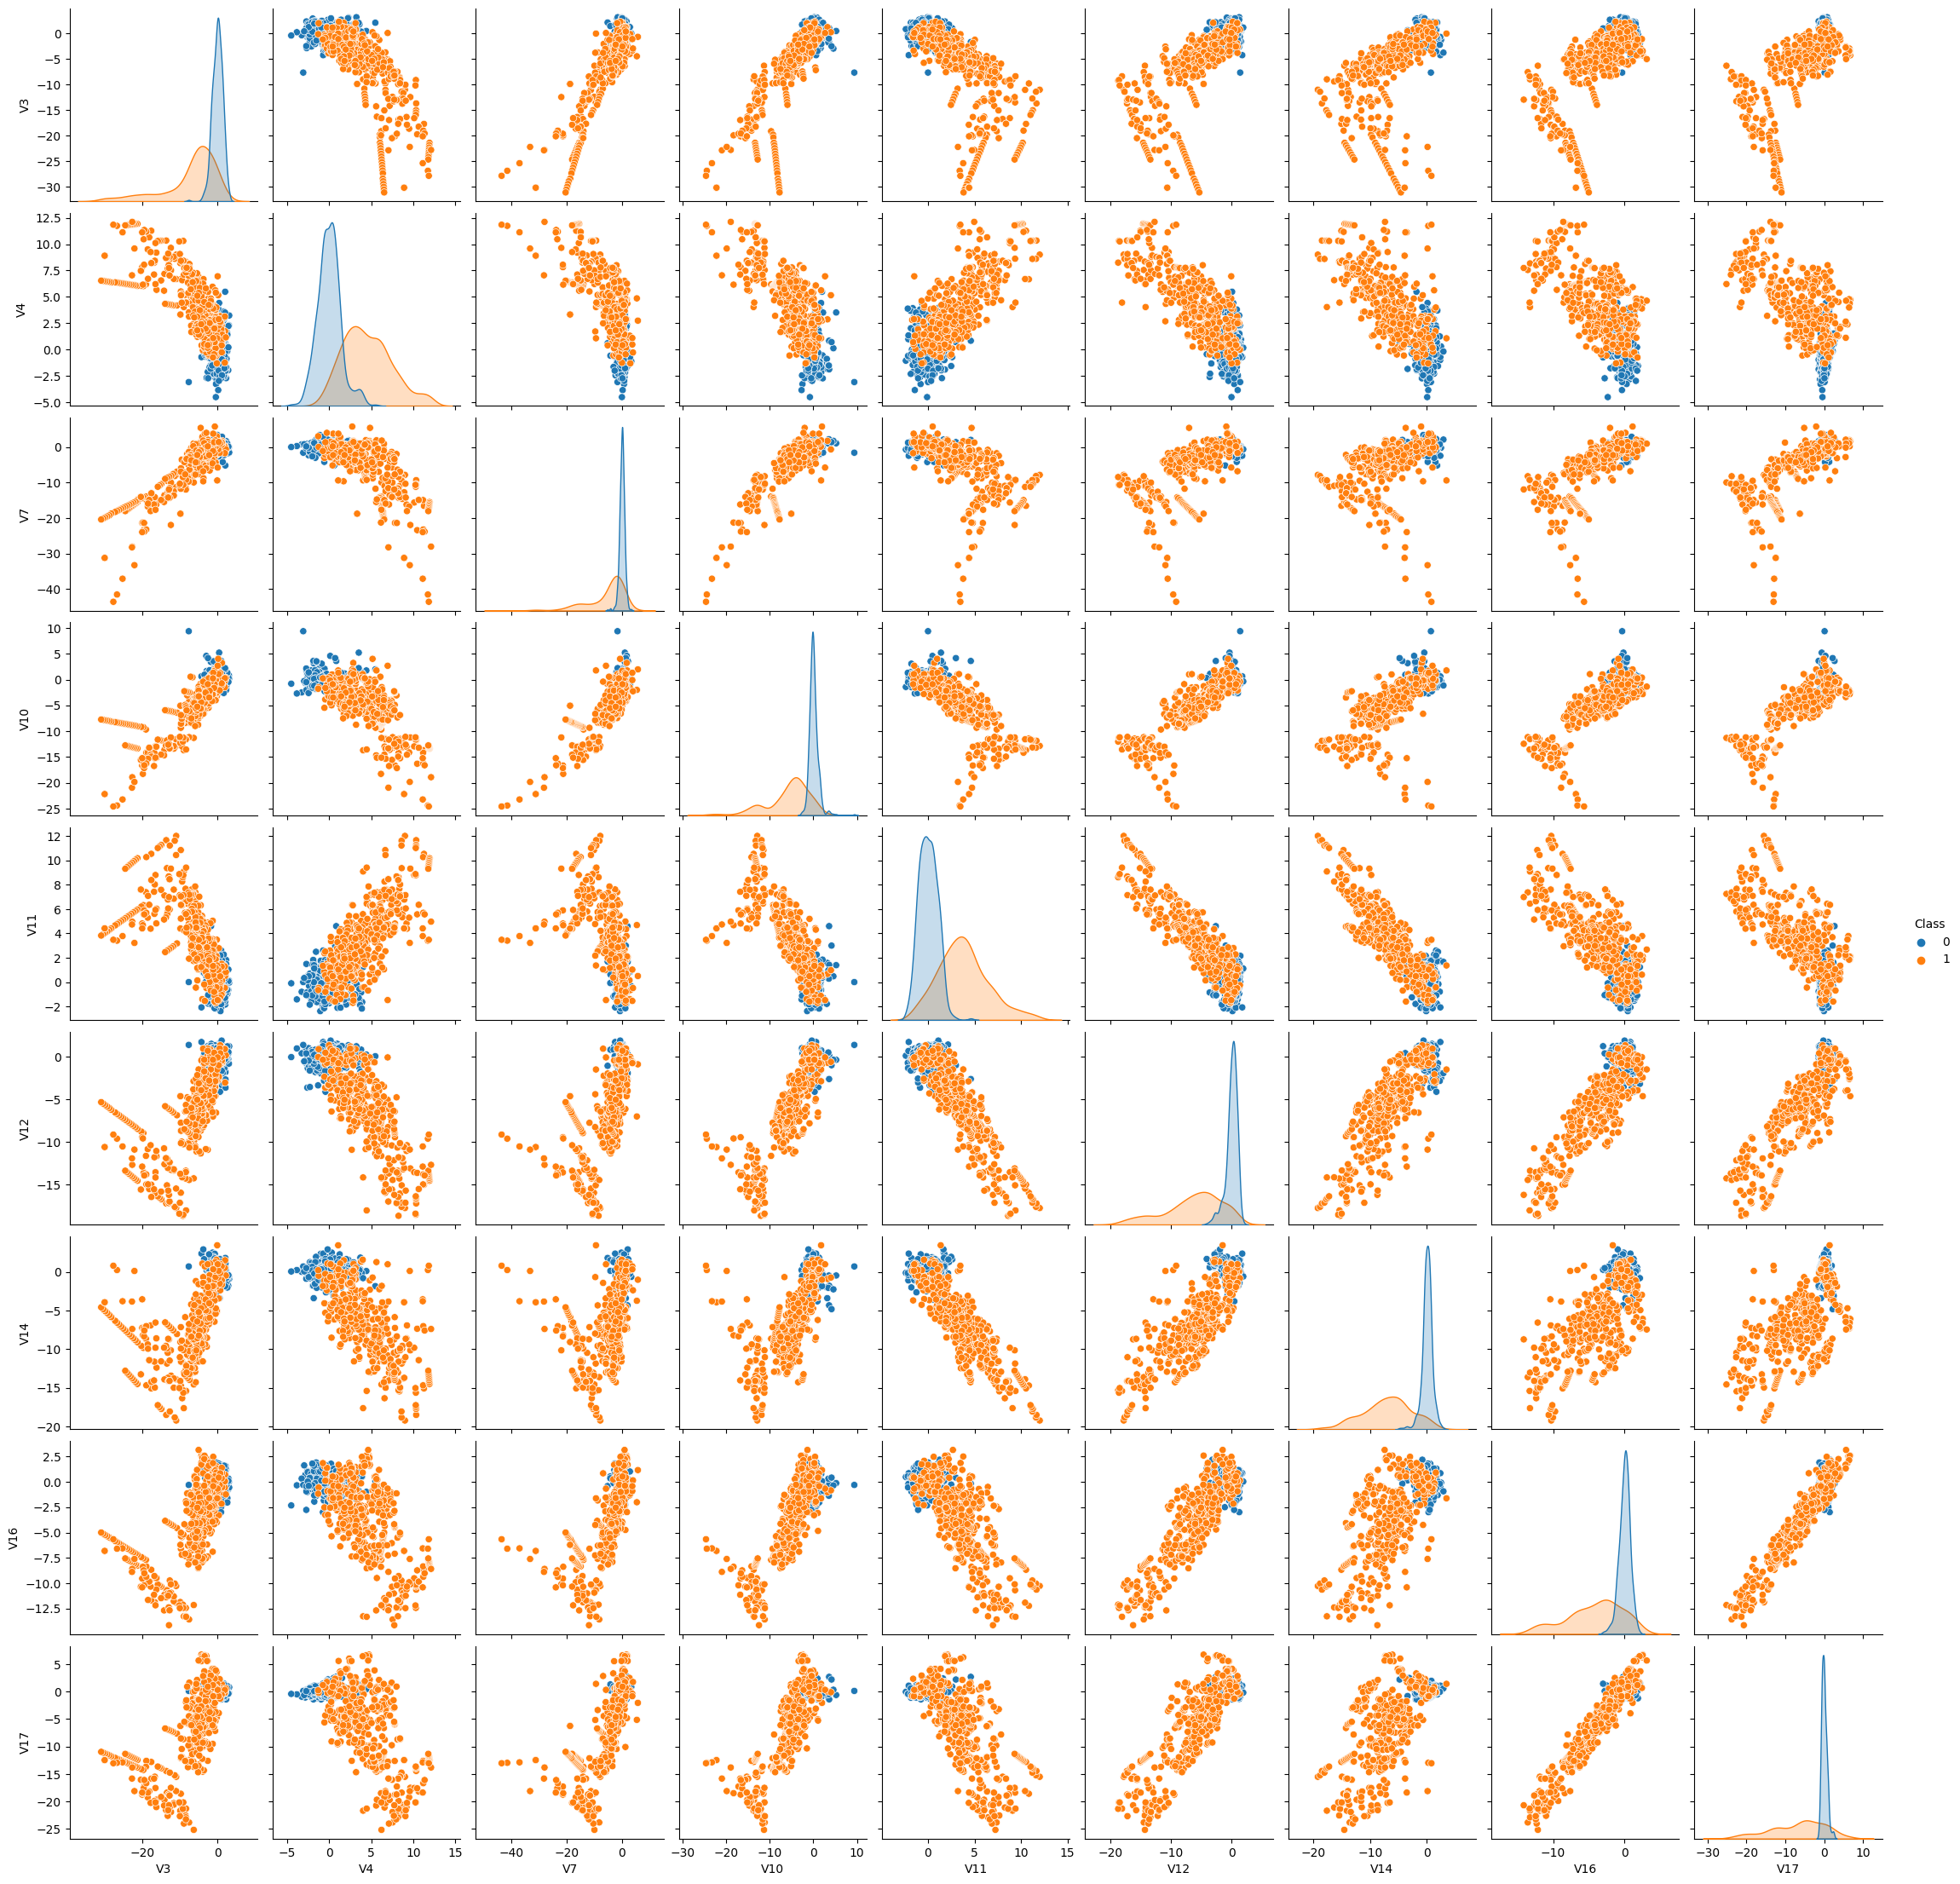

In [18]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')
# Pair Plot of all variables
sns.pairplot(downsampled_df, hue='Class')

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 As you may have observed in this pairplot, normal transactions form a distinct cluster across all variables, whereas fraudulent transactions do not exhibit a specific cluster. This makes outlier detection extremely challenging. Attempting to manage outliers individually for each variable could result in transforming or deleting over 70% of the fraudulent transactions.
</div>

<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana;">
     ⚠️ Fraudulent transactions do not exhibit clustering behavior and do not conform to a normal distribution, making outlier identification challenging.
    

<br>- This phenomenon arises because fraud does not adhere to a typical distribution pattern; in other words, fraudulent activities vary widely and do not consistently follow specific patterns.

<br>- Fraudsters employ diverse methods that evolve over time. It's important to note that simply obtaining credit card details and full names is insufficient for completing transactions. Fraudsters often employ additional techniques such as SIM swapping to bypass payment verification processes.

<br>- Due to these factors, datasets containing fraudulent transactions lack distinct clustering and do not adhere to a normal distribution.

<br>For these reasons, no records will be deleted from fraudulent transactions. Additionally, it's important to consider that fraudulent transactions are rare, making each record valuable. 

<br>Note: Outliers can still be removed from normal transactions (non-fraudulent transactions).
</div>


In [22]:
#Export the processed data
df2.to_csv("../data/processed/processed_data.csv", index=False)

## 6. Proper Data Splitting

In [23]:
#Load the processed data
df2 = pd.read_csv('../data/processed/processed_data.csv')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

# Original imbalanced data (df2)
X = df2.drop(columns='Class')
y = df2['Class']

# Step 1: Split the original data into training and testing sets with stratification
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Downsample only the training data to ensure no data leakage
train_data = X_train_orig.copy()
train_data['Class'] = y_train_orig

# Separate the majority and minority classes in the training data
majority_class = train_data[train_data['Class'] == 0]  # Assuming 0 is the majority class
minority_class = train_data[train_data['Class'] == 1]  # Assuming 1 is the minority class

# Downsample the majority class
majority_downsampled = resample(majority_class, 
                                replace=False,    # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Step 3: Prepare the downsampled training set and the original test set
X_train_downsampled = downsampled_train_data.drop(columns='Class')
y_train_downsampled = downsampled_train_data['Class']

<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana;">
     ⚠️ To properly split the data, we need to follow these rules:

- **Use a stratified split:** Since the data is highly imbalanced, a random split might result in a training or test set with no fraud transactions. Fraud transactions represent only a fraction of the dataset, so the risk of ending up with a dataset without fraud transactions is high. A stratified split ensures that this imbalance is maintained in both the training and test sets, preventing this issue.

- **Downsample the training data:** As previously explained, this is important to avoid bias and ensure that the model learns effectively.

- **Ensure the distribution of the test data matches the distribution in the original data:** This is crucial for evaluating the model's performance in real-world scenarios.

- **Avoid data leakage:** Ensure that there is no overlap between the final training and test datasets to prevent information from the test set influencing the training process.

</div>

## 7. Quick Test Using LazyPredict

In [17]:
!pip install lazypredict


  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.5 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 15.3 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from lazypredict.Supervised import LazyClassifier

# Step 4: Initialize LazyClassifier and fit the model
clf = LazyClassifier(random_state=42)

# Fit the models using the downsampled training data and test on the original test set
models, predictions = clf.fit(X_train_downsampled, X_test_orig, y_train_downsampled, y_test_orig)

# Display the performance of the models
models

100%|██████████| 32/32 [00:01<00:00, 20.49it/s]

[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,1.00,0.97,0.97,1.00,0.05
LogisticRegression,0.99,0.97,0.97,0.99,0.02
CalibratedClassifierCV,0.99,0.97,0.97,0.99,0.07
Perceptron,0.98,0.97,0.97,0.99,0.01
ExtraTreesClassifier,0.98,0.97,0.97,0.99,0.12
RandomForestClassifier,0.98,0.97,0.97,0.99,0.13
KNeighborsClassifier,0.98,0.97,0.97,0.99,0.23
LGBMClassifier,0.98,0.97,0.97,0.99,0.26
AdaBoostClassifier,0.98,0.97,0.97,0.99,0.15


In [21]:
from lazypredict.Supervised import LazyClassifier

# Step 4: Initialize LazyClassifier and fit the model
clf = LazyClassifier(random_state=42)

# Fit the models using the downsampled training data and test on the original test set
models, predictions = clf.fit(X_train_downsampled, X_test_orig, y_train_downsampled, y_test_orig)

# Display the performance of the models
models

 97%|█████████▋| 28/29 [00:13<00:00,  3.60it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

100%|██████████| 29/29 [00:14<00:00,  2.05it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.95,0.95,0.99,0.17
LinearSVC,0.97,0.95,0.95,0.98,0.17
SVC,0.99,0.95,0.95,0.99,0.56
SGDClassifier,0.99,0.95,0.95,0.99,0.17
CalibratedClassifierCV,0.98,0.95,0.95,0.99,0.27
PassiveAggressiveClassifier,0.98,0.94,0.94,0.99,0.17
ExtraTreesClassifier,0.97,0.94,0.94,0.98,0.85
KNeighborsClassifier,0.98,0.94,0.94,0.99,3.22
RandomForestClassifier,0.96,0.94,0.94,0.98,1.02


<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana;">
     ⚠️ **Avoiding the Big Trap:** Let's remember that our test data is highly imbalanced. Relying solely on accuracy as the main metric for choosing our model is a significant mistake. The proper approach is to find a model that balances accuracy, precision, recall, and F1 score. However, since detecting normal transactions is not challenging for machine learning models, we will focus on the F1 score for fraudulent transactions (Class == 1).

</div>

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score

# Initialize the models
models = {
    'BernoulliNB': BernoulliNB(),
    'NuSVC': NuSVC(probability=True),  # NuSVC requires probability=True for probability estimates
    'NearestCentroid': NearestCentroid()
}

# Fit models and calculate F1 scores
f1_scores = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train_downsampled, y_train_downsampled)
    
    # Make predictions
    y_pred = model.predict(X_test_orig)
    
    # Calculate F1 score for class == 1
    f1_scores[name] = f1_score(y_test_orig, y_pred, pos_label=1)

# Display the F1 scores for each model
print("F1 Scores for class == 1:")
for name, score in f1_scores.items():
    print(f"{name}: {score:.4f}")


F1 Scores for class == 1:
BernoulliNB: 0.0994
NuSVC: 0.5950
NearestCentroid: 0.8144


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Here, we chose the three models with the highest accuracy. However, we compared their F1 scores for Class == 1 and obtained the following results:

**F1 Scores for Class == 1:**
- BernoulliNB: 0.0994
- NuSVC: 0.5950
- NearestCentroid: 0.8144

Our winner is NearestCentroid, so let's proceed to the next section.
</div>

## 8. Final Model

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



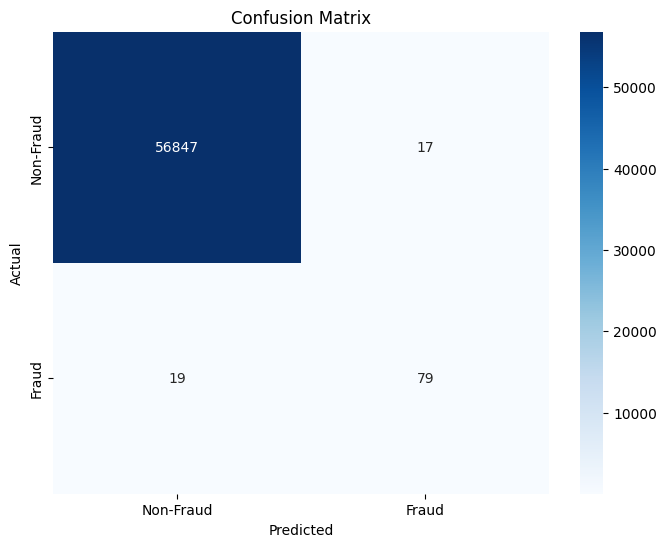

In [23]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the NearestCentroid model
FRAUDFIGHTER = NearestCentroid()

# Fit the model on the downsampled training data
FRAUDFIGHTER.fit(X_train_downsampled, y_train_downsampled)

# Predict on the original test data
y_pred = FRAUDFIGHTER.predict(X_test_orig)

# Generate classification report
report = classification_report(y_test_orig, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 FRAUDFIGHTER demonstrates excellent performance in identifying normal transactions and shows strong, though slightly less perfect, performance in detecting fraudulent transactions. The high accuracy is somewhat skewed by the imbalanced dataset, but the F1 score for fraudulent transactions indicates that the model is effective at detecting fraud while maintaining a good balance between precision and recall.
</div>

# Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



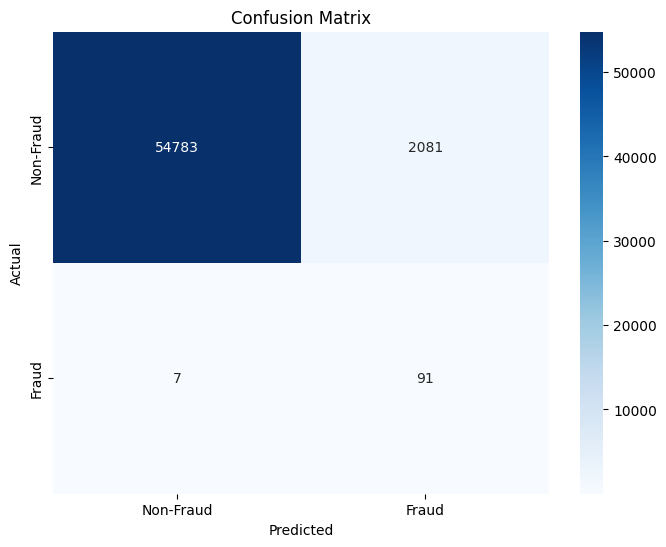

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
log_reg = LogisticRegression()

# Fit the model on the downsampled training data
log_reg.fit(X_train_downsampled, y_train_downsampled)

# Predict on the original test data
y_pred = log_reg.predict(X_test_orig)

# Generate classification report
report = classification_report(y_test_orig, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Save the model to a pickle file in the 'models' directory
model_directory = '../models'
model_filename = 'logistic_regression_model.pkl'

# Create the directory if it doesn't exist
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_filepath = os.path.join(model_directory, model_filename)

with open(model_filepath, 'wb') as file:
    pickle.dump(log_reg, file)

print(f"Model saved to {model_filepath}")

Model saved to ../models\logistic_regression_model.pkl


## 9. Minimizing False Negatives: A Crucial Step

<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana;">
     ⚠️ In credit card fraud detection, minimizing false negatives (fraudulent transactions classified as non-fraudulent) is crucial and often as important as accuracy, if not more so. Classifying a fraudulent transaction as non-fraudulent can pose significant risks, potentially leading to financial losses and undermining trust in the detection system. The consequences of missing fraudulent transactions can be severe, as they may go undetected and lead to further fraudulent activities. Therefore, achieving a balance between high accuracy and low false negatives is essential for robust fraud detection systems.

</div>


<div class="alert alert-block alert-danger" style="font-size:14px; font-family:verdana;">
     ⚠️ Example: 
    


- Suppose a bank earns $1 profit per transaction, whether normal or fraudulent.
- There are 100 transactions: 99 normal and 1 fraudulent.
- Profit from 99 normal transactions: ( 99 x \$1 = \$99 )

Now, consider the fraudulent transaction:
- Fraudulent transaction amount: \$100.
- If misclassified as normal, bank earns: \$1.
- Actual loss to the bank: \$100.

In this case:
- Bank's profit from normal transactions: \$99.
- Loss from misclassified fraudulent transaction: \$100.

Misclassifying the fraudulent transaction as normal means:
- Bank's total profit calculation: \( \$99 + \$1 = \$100 \).
- Actual loss due to fraud: \$100.

Therefore, misclassifying one fraudulent transaction as normal would result in the bank losing all the profits earned from normal transactions, resulting in a net profit of \$0.

</div>

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 For this dataset, we didn’t find a way to reduce false negatives. However, we included the above disclaimers to make this notebook useful for all kinds of datasets. We also explained why false negatives are a significant issue for fraud detection datasets!
</div>

## 10. Features Importance

Feature Importances:
   Feature  Importance  Std Dev
0      V3        0.12     0.01
6     V14        0.11     0.01
8     V17        0.09     0.01
5     V12        0.08     0.01
3     V10        0.06     0.01
2      V7        0.06     0.01
1      V4        0.04     0.01
7     V16        0.04     0.00
4     V11        0.03     0.00


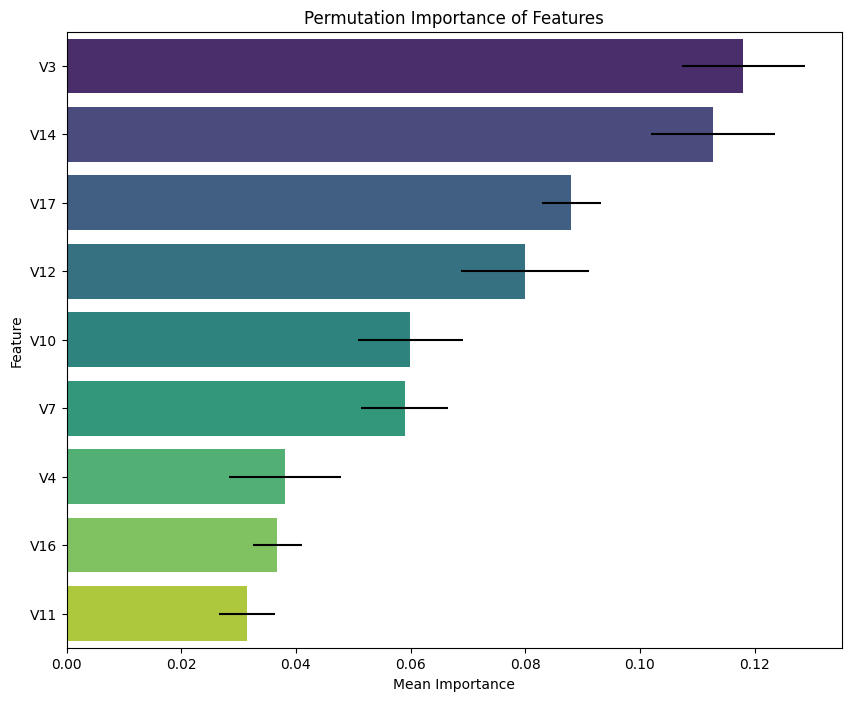

In [24]:
from sklearn.inspection import permutation_importance


# Compute permutation importance
result = permutation_importance(model, X_test_orig, y_test_orig, n_repeats=10, random_state=42, scoring='f1')

# Get mean and standard deviation of importance values
importance = result.importances_mean
std = result.importances_std

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X_test_orig.columns,
    'Importance': importance,
    'Std Dev': std
}).sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, xerr=importance_df['Std Dev'], palette='viridis')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance of Features')
plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 We assessed feature importance and found that `V3`, `V14`, and `V17` are the top contributors to our model’s performance. 
</div>

## 11. Conclusions 


1. **Effective Model Development:** Through meticulous data preprocessing, feature selection, and model optimization steps, we've developed a robust fraud detection model.
   
2. **Importance of Imbalance Handling:** Addressing the imbalance in the dataset was critical. Downsampling the majority class improved model performance by ensuring balanced representation of fraudulent and non-fraudulent transactions.

3. **Model Performance:** Our final model, FRAUDFIGHTER, achieved an impressive accuracy of 99% with minimal false negatives and false positives. This underscores its capability to accurately detect fraudulent transactions.

6. **Real-world Application:** The methodologies and techniques applied here are crucial for real-world applications, where the cost of misclassifying fraudulent transactions can be substantial both financially and in terms of trust and customer satisfaction.

7. **Future Directions:** Further enhancements could involve exploring advanced feature engineering techniques, integrating additional data sources, or deploying the model in a real-time environment to continuously improve fraud detection capabilities.

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 👋 Thank you for reading this notebook! If you found this content useful, please consider giving it an upvote. Your support is greatly appreciated! 🌟.
</div>